<a href="https://colab.research.google.com/github/jonathabsilva/TecImpIA/blob/main/Avaliacao1TAIA%5BAjustada%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação 1
Consideração o modelo de previsão de demanda, realizar a análise dos seguintes itens:

1. Modificar as funções de ativação utilizando Relu, Sigmod, tanh, etc. Analisar o desempenho da RNA. ✅

2. Modificar o número de camadas ocultas e neurônios (Sintonização da melhor rede) https://wandb.ai/site 

3. Realizar um estudo sobre o otimizador “Adam”

4. Na fase de teste, avaliar as métricas de:

  a. Erro Relativo Absoluto: |t-s|/t

  b. MAPE ✅

  c. Máximo Erro Relativo Absoluto: max(|t-s|)/t

5. Realizar a Previsão diária considerando um dia para frente e sete dias para atrás, com a finalidade de encontrar a melhor rede com ERA<10% e MAPE<3%. Utilize a 'Normalização' e faça a 'desnormalização' para mostrar os valores da previsão da potência. ✅

# Importação das Bibliotecas

Aqui, importa-se as seguintes bibliotecas:
1. tensorflow - 
2. pandas - 
3. numpy - 
4. matplotlib.pyplot - 



In [137]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Leitura e Ajuste dos Dados

In [138]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
df = pd.read_csv('/content/drive/MyDrive/DESENVOLVIMENTO PESSOAL/MESTRADO/TÉCNICAS APLICADAS DE INTELIGÊNCIA ARTIFICIAL/Exemplo Previsão de Demanda/Parte 1 - Atualizado/dados_demanda.csv',delimiter=';')
df.dropna(axis=1,inplace=True)

df['TEMPO'] = df[['DIA','MES','ANO','HORA','MINUTO']].apply(lambda x : datetime(year=x[2],month=x[1],day=x[0],hour=x[3],minute=x[4]), axis=1)
df.drop(['MINUTO','HORA','ANO','DIA','MES'],axis=1,inplace=True)
df.rename(columns={'JPS_12B1':'POTENCIA'},inplace=True)
df['POTENCIA']=df['POTENCIA'].str.replace(',', '.').astype(float)
df.set_index('TEMPO',inplace=True)

In [140]:
maxima_semanal=df.resample('W').agg(['max'])

In [141]:
dias_tras = 7
dias_frente = 1

In [142]:
data = pd.DataFrame()
data['POTÊNCIA'] = maxima_semanal

for i in range(1,dias_tras+1):
  data['POTÊNCIA(K-'+str(i)+')'] = maxima_semanal.shift(i)



for i in range(1,dias_frente+1):
  data['POTÊNCIA(K+'+str(i)+')'] = maxima_semanal.shift(-i)

In [143]:
data.dropna(axis=0, inplace=True)
dataMax = data

In [144]:
np.array(maxima_semanal.agg(['max']))[0][0]

24.1000003814697

In [145]:
fator_treino = 0.72
data_dim, len_data = data.shape #Pega a quantidade de dados. O segundo termo não é necessário, pois já se sabe a quantidade de colunas de treinamento e de saída. 
data_treino_dim = data_dim*fator_treino

len_train = dias_tras+1 #Número de colunas usadas para treino

In [146]:
data = np.array(data)
data = tf.keras.utils.normalize(data,axis=1)

x_train = data[0:216,0:len_train]
y_train = data[0:216,len_train:len_data]

x_test = data[216:308,0:len_train]
y_test = data[216:308,len_train:len_data]

In [147]:
data.shape

(306, 9)

# Questão 01

Modificar as funções de ativação utilizando Relu, Sigmod, tanh, etc. Analisar o desempenho da RNA.

In [148]:
funcoes = [tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh, tf.nn.softmax]
medicoes = dict()
val_loss = dict()
val_mse = dict()

for funcao in funcoes:

  # Criando Rede
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(8))

  for i in [20,20,1]:
    model.add(tf.keras.layers.Dense(i,activation=funcao))

  # Parâmetros de treinamento
  model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics = ['mean_squared_error'])

  # Treinando 
  model.fit(x_train,y_train,epochs=500)
  val_loss[funcao], val_mse[funcao] = model.evaluate(x_test,y_test)

melhor_funcao = list(val_mse.keys()) [list(val_mse.values()).index(min(val_mse.values()))]
melhor_funcao

Epoch 1/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 9/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 10/500
7/7 [===================

<function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>

In [149]:
melhor_funcao = list(val_mse.keys()) [list(val_mse.values()).index(min(val_mse.values()))]
melhor_funcao


<function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>

In [150]:
val_loss

{<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>: 0.11010235548019409,
 <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>: 0.0003956052241846919,
 <function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>: 0.0003528751549310982,
 <function tensorflow.python.ops.nn_ops.softmax_v2(logits, axis=None, name=None)>: 0.4476436972618103}

# Questão 02

Modificar o número de camadas ocultas e neurônios (Sintonização da melhor rede)

In [151]:
def gera_camadas(n_min, n_max):
  camadas = list()
  for i in range(n_min,n_max):
    for j in range(n_min,n_max):
      camadas.append([i,j,1])
  return camadas

In [152]:
medicoes = dict()
val_loss = dict()
val_mse = dict()

camadas = gera_camadas(5,20)

for camada in camadas:

  # Criando Rede
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(dias_tras+dias_frente))

  for i in camada:
    model.add(tf.keras.layers.Dense(i,activation=melhor_funcao))

  # Parâmetros de treinamento
  model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics = ['mean_squared_error'])

  # Treinando 
  model.fit(x_train,y_train,epochs=5)
  val_loss[str(camada)], val_mse[str(camada)] = model.evaluate(x_test,y_test)

melhor_camada = list(val_mse.keys()) [list(val_mse.values()).index(min(val_mse.values()))]

Epoch 1/5
7/7 [==============================] - 0s 4ms/step - loss: 0.8617 - mean_squared_error: 0.8617
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: 0.7247 - mean_squared_error: 0.7247
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 0.5834 - mean_squared_error: 0.5834
Epoch 4/5
7/7 [==============================] - 0s 4ms/step - loss: 0.4451 - mean_squared_error: 0.4451
Epoch 5/5
3/3 [==============================] - 0s 5ms/step - loss: 0.2498 - mean_squared_error: 0.2498
Epoch 1/5
7/7 [==============================] - 0s 4ms/step - loss: 0.4346 - mean_squared_error: 0.4346
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: 0.3143 - mean_squared_error: 0.3143
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 0.2110 - mean_squared_error: 0.2110
Epoch 4/5
7/7 [==============================] - 0s 4ms/step - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 5/5
3/3 [==============================] - 0s 4ms

In [153]:
teste = melhor_camada.split('[')[1]
teste = teste.split(']')[0]
teste = teste.split(', ')
camada = list()
for i in range(len(teste)):
  camada.append(int(teste[i]))

camada
  

[19, 16, 1]

# Questão 03
Realizar um estudo sobre o otimizador “Adam”

#Questão 4
 Na fase de teste, avaliar as métricas de:

  a. Erro Relativo Absoluto: |t-s|/t ✅

  b. MAPE ✅

  c. Máximo Erro Relativo Absoluto: max(|t-s|)/t ✅

## a. Erro Relativo Absoluto

 |t-s|/t

In [154]:
def Err_Rel_Abs(a,b):    
  from statistics import mean
  ERA = list()
  for i in range(len(a)):
    ERA.append(abs((a[i] - b[i])/a[i])[0])
  return ERA

In [155]:
Err_Rel_Abs(y_test, y_pred)

[0.020879701256709977,
 0.024107153274856765,
 0.056067005923431466,
 0.006147584725191184,
 0.0498750481050396,
 0.020569448363033635,
 0.030748781266800775,
 0.023939344331966775,
 0.1257729930039042,
 0.015435189098012508,
 0.05399221370099663,
 0.00696086844589752,
 0.04056151550199795,
 0.058336772438913824,
 0.05991934911840804,
 0.014756515520762875,
 0.004736618873587292,
 0.03638697875247971,
 0.009037200360745113,
 0.0038770555959252604,
 0.06252069533090615,
 0.03933809087944733,
 0.007497687474123014,
 0.006278628015655196,
 0.0024563327492129394,
 0.025171077213552016,
 0.03986733917811391,
 0.0010289850471764494,
 0.030382693320103998,
 0.020874757518049174,
 0.02610444290982285,
 0.020602911091922138,
 0.001124491158704311,
 0.010977152159585717,
 0.0176342982604737,
 0.11702940637631574,
 0.08221228334585844,
 0.020596722202354225,
 0.07758405907130697,
 0.023597900099538847,
 0.014051231905808795,
 0.007155064400062426,
 0.03282828775651318,
 0.016093423310986697,
 0.0

In [156]:
max(Err_Rel_Abs(y_test, y_pred))

0.3616255257517024

  ## b. MAPE 

In [157]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [158]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE 
#val_loss, val_mse = model.evaluate(x_test,y_test)
#y_pred = model.predict(x_test)

0.036221965789885464

In [159]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.011533100505566763

## c. Máximo Erro Relativo Absoluto: max(|t-s|)/t 

# Questão 05
Realizar a Previsão diária considerando um dia para frente e sete dias para atrás, com a finalidade de encontrar a melhor rede com ERA<10% e MAPE<3%. Utilize a 'Normalização' e faça a 'desnormalização' para mostrar os valores da previsão da potência.


## Treinamento

In [160]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(dias_tras+dias_frente))
for i in camada:
  model.add(tf.keras.layers.Dense(i,activation=melhor_funcao))

# Parâmetros de treinamento
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics = ['mean_squared_error'])

# Treinando 
model.fit(x_train,y_train,epochs=5000)
loss, mse = model.evaluate(x_test,y_test)


A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 2502/5000
7/7 [==============================] - 0s 4ms/step - loss: 1.8663e-05 - mean_squared_error: 1.8663e-05
Epoch 2503/5000
7/7 [==============================] - 0s 4ms/step - loss: 8.6873e-06 - mean_squared_error: 8.6873e-06
Epoch 2504/5000
7/7 [==============================] - 0s 6ms/step - loss: 8.4969e-06 - mean_squared_error: 8.4969e-06
Epoch 2505/5000
7/7 [==============================] - 0s 5ms/step - loss: 1.1124e-05 - mean_squared_error: 1.1124e-05
Epoch 2506/5000
7/7 [==============================] - 0s 5ms/step - loss: 1.0848e-05 - mean_squared_error: 1.0848e-05
Epoch 2507/5000
7/7 [==============================] - 0s 4ms/step - loss: 8.0346e-06 - mean_squared_error: 8.0346e-06
Epoch 2508/5000
7/7 [==============================] - 0s 3ms/step - loss: 1.5851e-05 - mean_squared_error: 1.5851e-05
Epoch 2509/5000
7/7 [==============================] - 0s 4ms/step - loss: 1.2118e-05 - mean_squared_error: 

## Examinando o desempenho da rede

In [161]:
maximo = np.array(maxima_semanal.agg(['max']))[0][0]

3/3 [==============================] - 0s 5ms/step - loss: 2.9770e-05 - mean_squared_error: 2.9770e-05


Text(0, 0.5, 'Potência Desnormalizada')

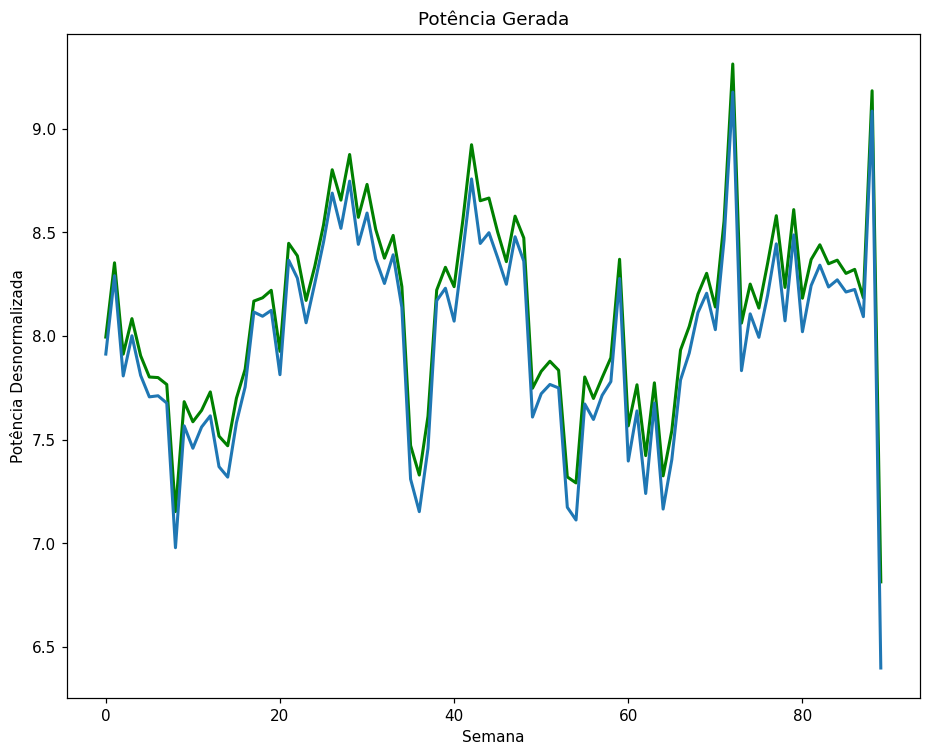

In [168]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(10,8),dpi=110)
plt.plot(y_pred[:,0]*maximo,lw=2,color='Green')
plt.plot(y_test[:,0]*maximo,lw=2)

plt.title('Potência Gerada')
plt.xlabel('Semana')
plt.ylabel('Potência Desnormalizada')


In [167]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
ERA = max(Err_Rel_Abs(y_test, y_pred))

print('MAPE: '+str(MAPE*100)+'%')
print('ERA: '+str(ERA*100)+'%')

if (MAPE*100 < 3) and (ERA*100 < 10):
  print('\nCondições atendidas!')
else:
  print('\nCondições não atendidas.')

MAPE: 1.5681698671938076%
ERA: 6.488765306662346%

Condições atendidas!
